In [1]:
# imports 

#importing libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# qn1: Import the data set, ‘insurance’. The column ‘charges’ should be considered as your target label.

In [2]:
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


By converting column charges column to target label

In [3]:
X = insurance.drop("charges",1)   #Feature Matrix
y = insurance["charges"]          #Target Variable
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# qn2: Explore the data using at least 3 data exploratory tools of your choosing in pandas and interpret your observation in a markdown cell of what form of predictive analysis that can be conducted on the data.

In [5]:
#understanding the data types
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [14]:
#understanding the numerical features
insurance.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


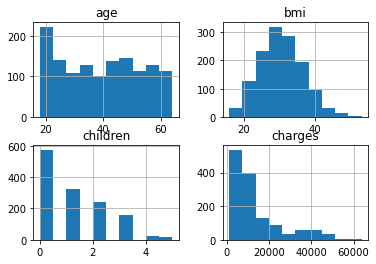

In [18]:
#Further understanding the numerical featuresFurther 
insurance.hist()
plt.show()

In [20]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
#checking for Null values
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Categorical columns like sex, smoker,region can undergo univariate analysis and be subject to operations like count%, count as well as being visualized through forms like bar chart, pie chart etc.

Numerical columns like age, bmi, children and charges can also undergo univariate analysis and be subjected to operations like min, max,mode, median,variance, standard deviation as well as being visaulized using the likes of boxplot, histogram etc 

# qn3: Visualize the age distribution for the column ‘age’ and comment on the results in a markdown cell as well. (Ensure your visualization is of an appropriate size for effective analysis)

In [24]:
#selecting the age column
df = pd.DataFrame(insurance, columns = ['age']) 
df.head()


,age
0,19
1,18
2,28
3,33
4,32


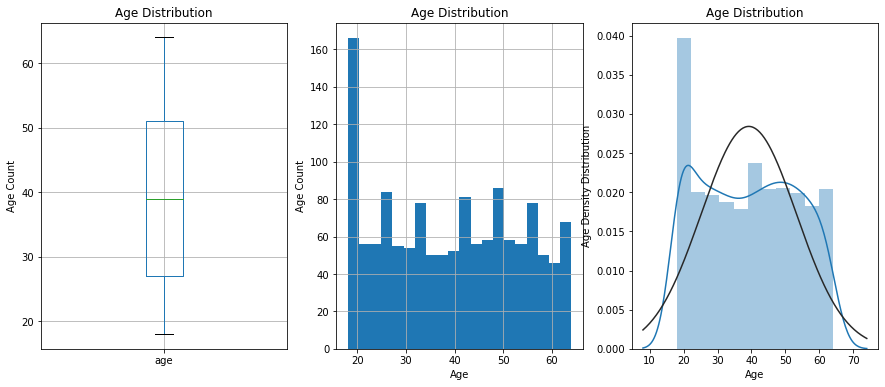

In [36]:
#by using seaborn distribution plot as well as normal distribution from scipy.stats
plt.figure(figsize=(15,6))
plt.subplot(1, 3, 1)
fig = insurance.boxplot(column='age')
fig.set_title('Age Distribution')
fig.set_ylabel("Age Count")

    
plt.subplot(1, 3, 2)
fig = insurance['age'].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Age Count')
    
plt.subplot(1, 3, 3)
fig =sns.distplot(df,fit=norm)
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Age Density Distribution')
plt.show()

From the graphs above its observed that age is quiet normally distributed and with very less skewness as well as having no outliers as observed from the box plot

# qn4: Isolate all the continuous and discrete columns into their respective lists named ‘numerical_continuous’ and ‘numerical_discrete’ respectively.

In [38]:
# First identifying numerical columns from Feature columns-X
numerical = [var for var in X.columns if X[var].dtype!='O']
numerical

['age', 'bmi', 'children']

In [42]:
#Picking discrete columns from numerical columns
numerical_discrete = []

for var in numerical:
    if len(X[var].unique())<20:
        print(var, ' values: ', X[var].unique())
        numerical_discrete.append(var)
print()
print('There are {} discrete variables'.format(len(numerical_discrete)))
numerical_discrete

children  values:  [0 1 3 2 5 4]

There are 1 discrete variables


['children']

In [44]:
#Picking continuous columns
numerical_continuous = [var for var in numerical if var not in numerical_discrete]
print('There are {} numerical and continuous variables'.format(len(numerical_continuous)))
numerical_continuous 

There are 2 numerical and continuous variables


['age', 'bmi']

# qn5: Visually identify if there is presence of any outliers in the numerical_continuous columns and resolve them using a zscore test and a threshold of your choosing.

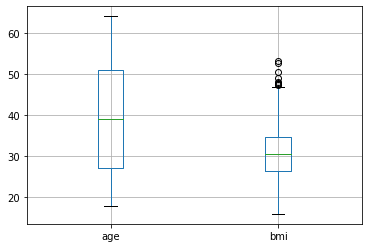

In [64]:
#First plotting columns of numerical continuous

X.boxplot(column=['age','bmi'])
plt.show()

It is observed that age column has no outliers so we proceed with only bmi


In [47]:
bmi_out = X['bmi']
bmi_out

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [49]:
#applying Z-score test to bmi data
from scipy import stats
z = np.abs(stats.zscore(bmi_out))
print(z)

[0.45332    0.5096211  0.38330685 ... 1.0148781  0.79781341 0.26138796]


In [50]:
#Using a threshold of 2
threshold = 2
print(np.where(z > 2))

(array([  28,  116,  128,  172,  198,  232,  250,  286,  292,  356,  380,
        383,  401,  410,  412,  428,  438,  442,  454,  493,  521,  543,
        547,  549,  563,  572,  582,  660,  674,  680,  701,  796,  811,
        821,  847,  860,  867,  895,  930,  941,  950,  951, 1024, 1029,
       1047, 1074, 1085, 1088, 1131, 1133, 1156, 1205, 1226, 1286, 1312,
       1317, 1332], dtype=int64),)


# qn6: Validate that your analysis above was successful by visualizing the value distribution in the resulting columns using an appropriate visualization method.

In [53]:
bmi_clean = bmi_out[(z < 2)]


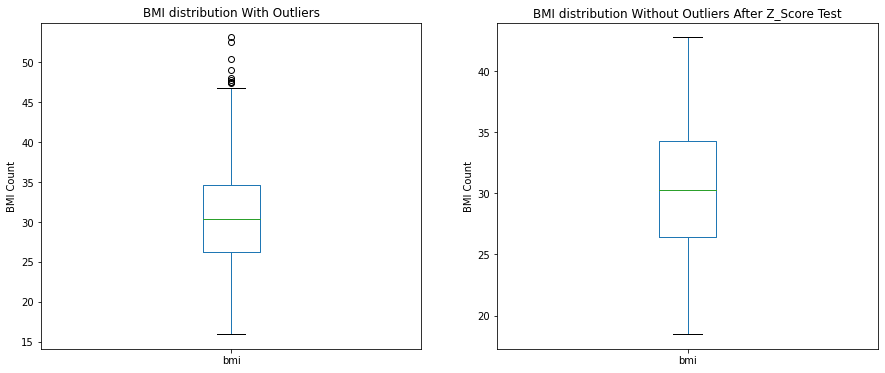

In [58]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = bmi_out.plot(kind='box')
fig.set_title('BMI distribution With Outliers')
fig.set_ylabel("BMI Count")

    
plt.subplot(1, 2, 2)
fig = bmi_clean.plot(kind='box')
plt.title("BMI distribution Without Outliers After Z_Score Test")
plt.ylabel('BMI Count')
plt.show()

# qn7: Isolate all the categorical column names into a list named ‘categorical’.

In [59]:
categorical = [var for var in X.columns if X[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
categorical

There are 3 categorical variables


['sex', 'smoker', 'region']

# qn8: Visually identify the outliers in the discrete and categorical features and resolve them using the combined rare levels method.

In [71]:
#First convert encode categorical features into numerical


from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
X['region'] = lb_make.fit_transform(X['region'])
X['smoker'] = lb_make.fit_transform(X['smoker'])
X['sex'] = lb_make.fit_transform(X['sex'])

X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


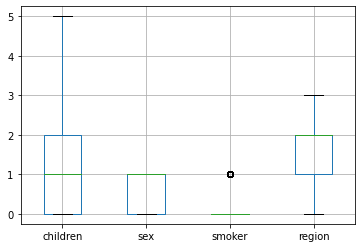

In [73]:
#subjecting both discrete and categorical features to boxplot
X.boxplot(column=['children','sex','smoker','region'])
plt.show()

It is observed that only smoker feature has outliers


# qn9: Encode the discrete and categorical features with one of the measures of central tendency of your choosing.

In [74]:
#Encoding using LabelEncoder
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
insurance['region'] = lb_make.fit_transform(insurance['region'])
insurance['smoker'] = lb_make.fit_transform(insurance['smoker'])
insurance['sex'] = lb_make.fit_transform(insurance['sex'])

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# qn10: Separate your features from the target appropriately. Narrow down the number of features to 5 using the most appropriate and accurate method. Which feature had to be dropped and what inference would you give as the main contributor of dropping the given feature.

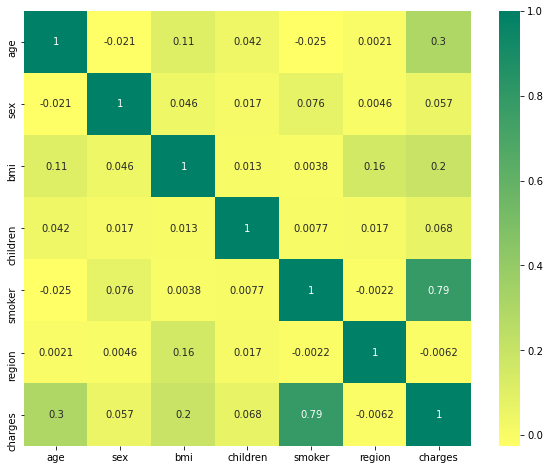

In [75]:
#first establsihing relationship between feature columns with the target label
plt.figure(figsize=(10, 8))
corr = insurance.corr()
sns.heatmap(corr, annot=True, cmap = 'summer_r')
plt.show()

In [77]:
cor_target = abs(corr["charges"])
cor_target

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region      0.006208
charges     1.000000
Name: charges, dtype: float64

In [78]:
#Narrowing down features to 5 by applyiing >0.05
five_features = cor_target[cor_target>0.05]
five_features

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

Region feature had to be dropped because there is very less correlation with the target column charges of 0.6208%